In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log
from collections import Counter

In [2]:
df = pd.read_json('top_ai_subset.txt',encoding="utf-8", lines=True)

In [3]:
df.head(10)

,id,title,authors,venue,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,references,indexed_abstract,fos,doi
0,100638832,Learning English Light Verb Constructions: Con...,"[{'name': 'Yuancheng Tu', 'id': '2161005799', ...",{'raw': 'meeting of the association for comput...,2011,28,31,39,Conference,Association for Computational Linguistics,,,"[40123913, 85238235, 1498763386, 1579558000, 1...","{'IndexLength': 138, 'InvertedIndex': {'In': [...","[{'name': 'Light verb', 'w': 0.556838751}, {'n...",NaN
1,101796631,A SVM-Based Model for Chinese Functional Chunk...,"[{'name': 'Yingze Zhao', 'id': '2616090506'}, ...",{'raw': 'meeting of the association for comput...,2006,3,94,101,Conference,,,,"[1623072288, 1823542770, 1954417598, 198899550...","{'IndexLength': 105, 'InvertedIndex': {'Functi...","[{'name': 'Predicate (grammar)', 'w': 0.455723...",NaN
2,1019104620,A Generative Model of Vector Space Semantics,"[{'name': 'Jacob Andreas', 'id': '2558501541',...",{'raw': 'meeting of the association for comput...,2013,5,91,99,Conference,,,,"[170166889, 1549334072, 1608322251, 1880262756...","{'IndexLength': 104, 'InvertedIndex': {'We': [...","[{'name': 'Computer science', 'w': 0.4223011},...",NaN
3,102083554,UBA: Using Automatic Translation and Wikipedia...,"[{'name': 'Pierpaolo Basile', 'id': '213524799...",{'raw': 'meeting of the association for comput...,2010,6,242,247,Conference,Association for Computational Linguistics,,,"[2092689630, 2128514324, 2153225416, 217998488...","{'IndexLength': 193, 'InvertedIndex': {'This':...","[{'name': 'Exploit', 'w': 0.40942737500000004}...",NaN
4,102440339,Learning Morphology with Pair Hidden Markov Mo...,"[{'name': 'Alexander Clark', 'id': '2586934785...",{'raw': 'meeting of the association for comput...,2001,21,55,60,Conference,,,,"[1513168562, 1797345057, 2009570821, 210244363...","{'IndexLength': 66, 'InvertedIndex': {'In': [0...","[{'name': 'Variable-order Bayesian network', '...",NaN
5,102951417,Improving summarization through rhetorical par...,"[{'name': 'Daniel Marcu', 'id': '1853234685', ...",{'raw': 'meeting of the association for comput...,1998,74,,,Conference,,,,"[40273907, 1667614912, 1828401780, 1967752093,...",NaN,"[{'name': 'Natural language processing', 'w': ...",NaN
6,104385336,SZTERGAK : Feature Engineering for Keyphrase E...,"[{'name': 'Gábor Berend', 'id': '2432553231', ...",{'raw': 'meeting of the association for comput...,2010,13,186,189,Conference,Association for Computational Linguistics,,,"[1490343430, 1907578970, 2045181608, 206077262...","{'IndexLength': 88, 'InvertedIndex': {'Automat...","[{'name': 'Supervised learning', 'w': 0.521146...",NaN
7,105490757,Designing Special Post-Processing Rules for SV...,"[{'name': 'Muhua Zhu', 'id': '2628080501', 'or...",{'raw': 'meeting of the association for comput...,2006,6,217,220,Conference,,,,"[1979145089, 2117400858, 2785522575]","{'IndexLength': 95, 'InvertedIndex': {'We': [0...","[{'name': 'Speech recognition', 'w': 0.4611401...",NaN
8,106250223,Recognizing Arguing Subjectivity and Argument ...,"[{'name': 'Alexander Conrad', 'id': '212173274...",{'raw': 'meeting of the association for comput...,2012,27,80,88,Conference,Association for Computational Linguistics,,,"[44262497, 1548608284, 1563792215, 2022204871,...","{'IndexLength': 128, 'InvertedIndex': {'In': [...","[{'name': 'Parsing', 'w': 0.487827063}, {'name...",NaN
9,106483518,Very Large Lexical Databases.,"[{'name': 'James Pustejovsky', 'id': '19915186...",{'raw': 'meeting of the association for comput...,2001,0,2,,Conference,,,,NaN,NaN,"[{'name': 'Artificial intelligence', 'w': 0.0}...",NaN


In [4]:
df.shape

(76011, 16)

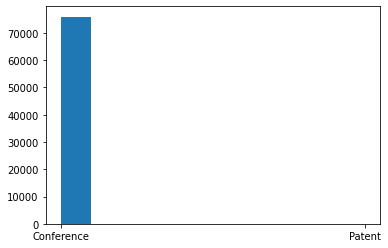

In [5]:
plt.hist(df["doc_type"])
plt.show()

In [6]:
Counter(df["doc_type"])

Counter({'Conference': 75938, 'Patent': 73})

In [7]:
pub_ctn=Counter(df["publisher"])
pub_ctn.pop("")

13949

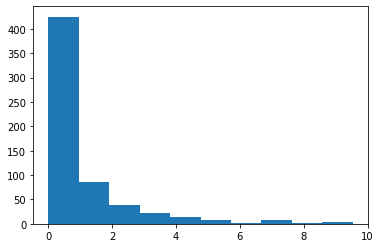

In [8]:
plt.hist([log(i) for i in pub_ctn.values()])
plt.show()

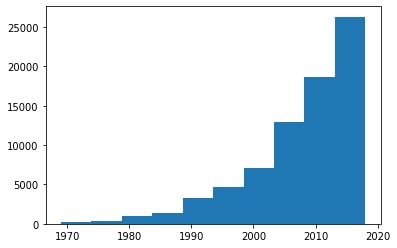

In [9]:
plt.hist(df["year"])
plt.show()

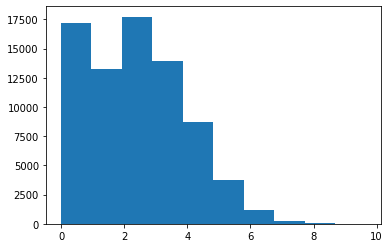

In [10]:
df['n_citation'] = df['n_citation'].apply(int)

plt.hist((df["n_citation"]+1).apply(log))
plt.show()

In [11]:
def castInt(x):
    try:
        return int(x)
    except:
        return 0

In [12]:
df['page_end'] = df['page_end'].apply(castInt)
df['page_start'] = df['page_start'].apply(castInt)

In [35]:
[df['page_end'] - df['page_start']]

[0        8
 1        7
 2        8
 3        5
 4        5
         ..
 76006    0
 76007    7
 76008    9
 76009    0
 76010    0
 Length: 76011, dtype: int64]

In [37]:
ctn=Counter(df['page_end'] - df['page_start'])

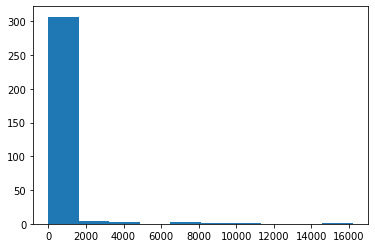

In [40]:
plt.hist([ctn[k] for k in ctn])
plt.show()

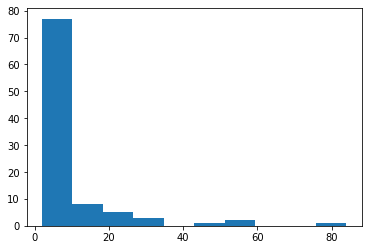

In [39]:
plt.hist([ctn[k] for k in ctn if 1<ctn[k]<100])
plt.show()

In [ ]:
# must be no smaller than 1 page
# >100: outliers
df['pageNum'] = df.apply(lambda df: min(max(df['page_end'] - df['page_start'], 1),100), axis=1)

In [13]:
df['pageNum'].describe()

count    76011.000000
mean         6.792083
std          3.797333
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max        100.000000
Name: pageNum, dtype: float64

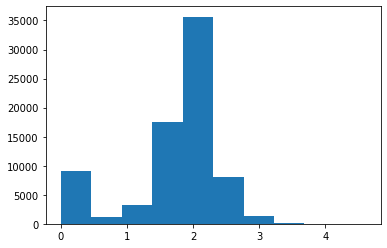

In [14]:
plt.hist(df['pageNum'].apply(log))
plt.show()

In [15]:
def castLen(x):
    try:
        return len(x)
    except:
        return 0

In [16]:
df['refNum'] = df.apply(lambda df: castLen(df["references"]), axis=1)

In [23]:
df["fos"][1]

[{'name': 'Predicate (grammar)', 'w': 0.45572385200000004},
 {'name': 'Parsing', 'w': 0.5548242},
 {'name': 'Support vector machine', 'w': 0.5176992420000001},
 {'name': 'Binary classification', 'w': 0.45089224},
 {'name': 'Top-down and bottom-up design', 'w': 0.4584853},
 {'name': 'Machine learning', 'w': 0.464945555},
 {'name': 'Chunking (psychology)', 'w': 0.5924408},
 {'name': 'Pattern recognition', 'w': 0.46912616500000004},
 {'name': 'Artificial intelligence', 'w': 0.0},
 {'name': 'Computer science', 'w': 0.412245631},
 {'name': 'Sentence', 'w': 0.5030235}]

In [25]:
print(max([i["w"] for i in df["fos"][1]]))

0.5924408


In [31]:
def castFos(df):
    try:
        return max([i["w"] for i in df["fos"]])
    except:
        return 0

In [32]:
df['maxFos'] = df.apply(lambda x: castFos(x), axis=1)

In [33]:
df['maxFos']

0        0.556839
1        0.592441
2        0.582053
3        0.597128
4        0.584847
           ...   
76006    0.772239
76007    0.629271
76008    0.715885
76009    0.602447
76010    0.533532
Name: maxFos, Length: 76011, dtype: float64

In [34]:
df[['n_citation','pageNum','refNum','maxFos']].corr()

,n_citation,pageNum,refNum,maxFos
n_citation,1.000000,0.056279,0.047943,0.040836
pageNum,0.056279,1.000000,0.376698,-0.033972
refNum,0.047943,0.376698,1.000000,-0.020339
maxFos,0.040836,-0.033972,-0.020339,1.000000
